In [2]:
#### 1.Loading_data_for_signature_analysis.R
## 1)Loading cluster results
Cluster.20200201.V7.Tumor <- readRDS("/data8t_4/JH/MyJobs/NormalCancer_TCGA_V2/Cluster.20200201.V7.Tumor.rds")
cutree.res <- Cluster.20200201.V7.Tumor$cutree.res
dynamicColors <- Cluster.20200201.V7.Tumor$dynamicColors
Cluster.df <- cbind(cutree.res,dynamicColors) 
Cluster.df <- as.data.frame(Cluster.df)
Cluster.df$rownames <- rownames(Cluster.df)
table(Cluster.df$dynamicColors)


     blue     brown turquoise    yellow 
      103        47       135         1 

In [3]:
#### 2.Overall_status_analysis.R
# Paper: Comparative Molecular Analysis of Gastrointestinal Adenocarcinomas
## 1.Read data
COAD_GI_Adenocarcinomas_Characteristics_And_Epigenetic_Silencing_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/TCGA_PanCancerAtlas_Publications/Comparative_Molecular_Analysis_of_Gastrointestinal_Adenocarcinomas/COAD_GI_Adenocarcinomas_Characteristics_And_Epigenetic_Silencing_dataset.rds")
COAD.GI.Adenocarcinomas.Characteristics <- COAD_GI_Adenocarcinomas_Characteristics_And_Epigenetic_Silencing_dataset$COAD.GI.Adenocarcinomas.Characteristics
#colnames(COAD.GI.Adenocarcinomas.Characteristics)
## 2.Merge table
MergeTable.GI.Char <- dplyr::left_join(Cluster.df, COAD.GI.Adenocarcinomas.Characteristics, by = "rownames")

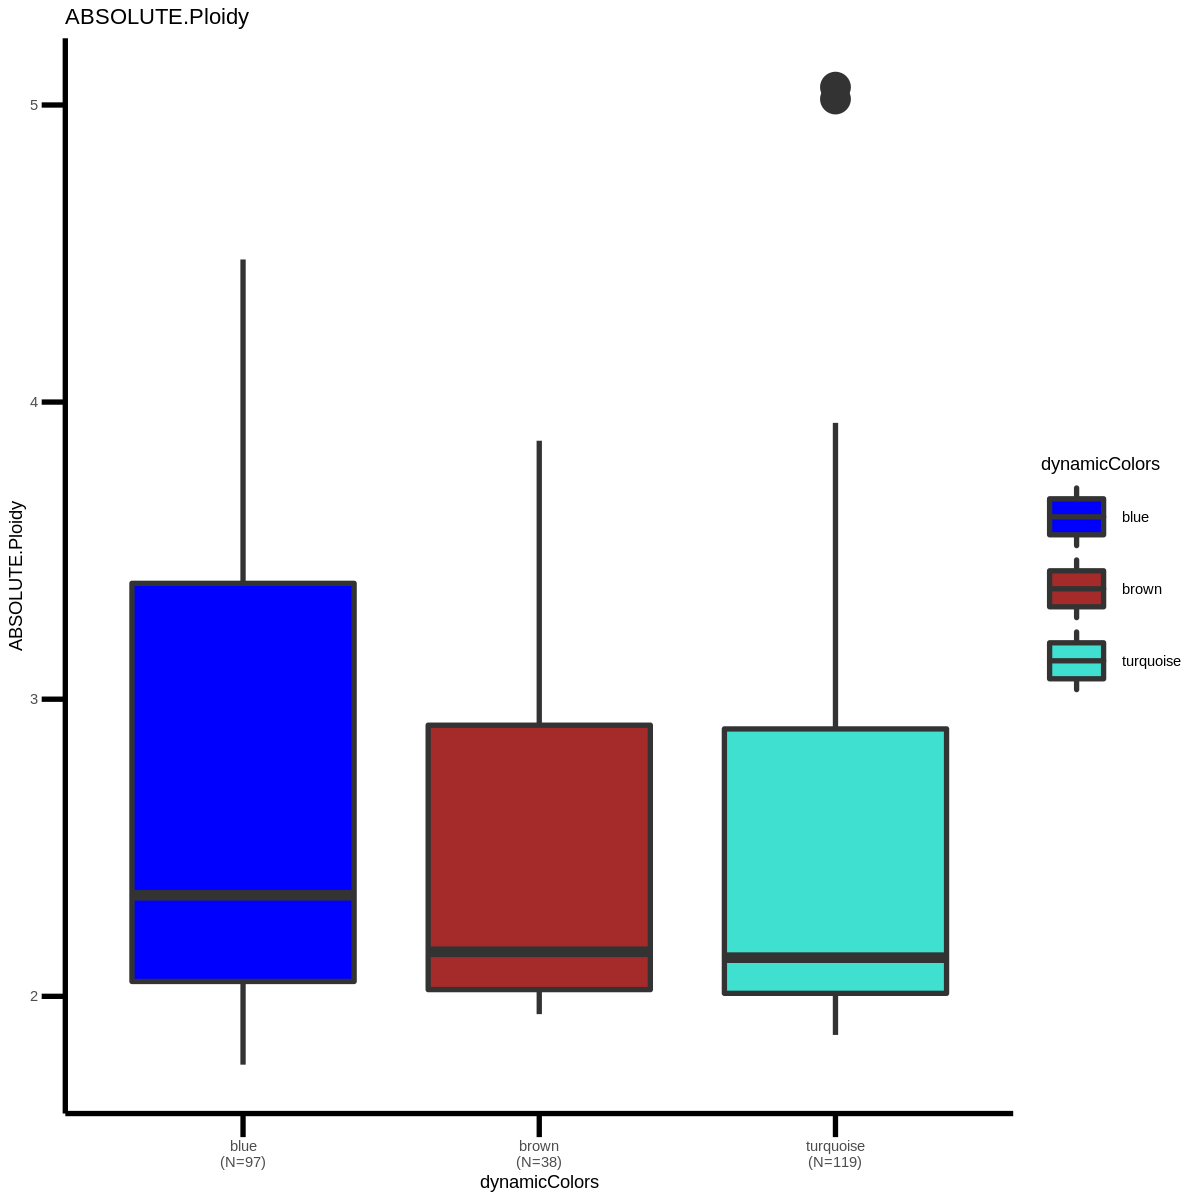

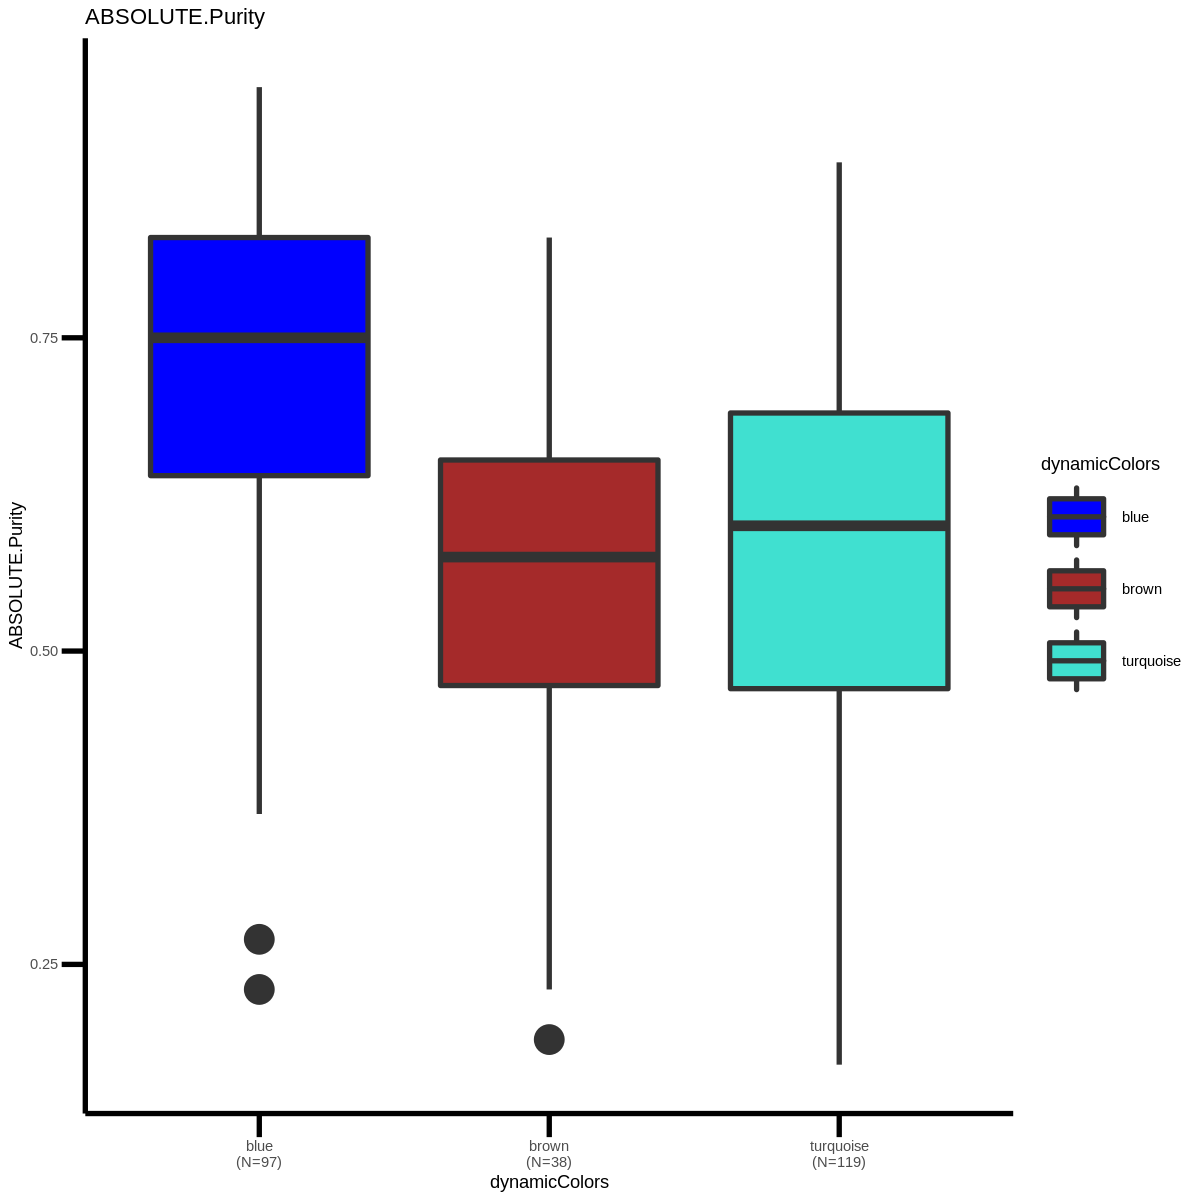

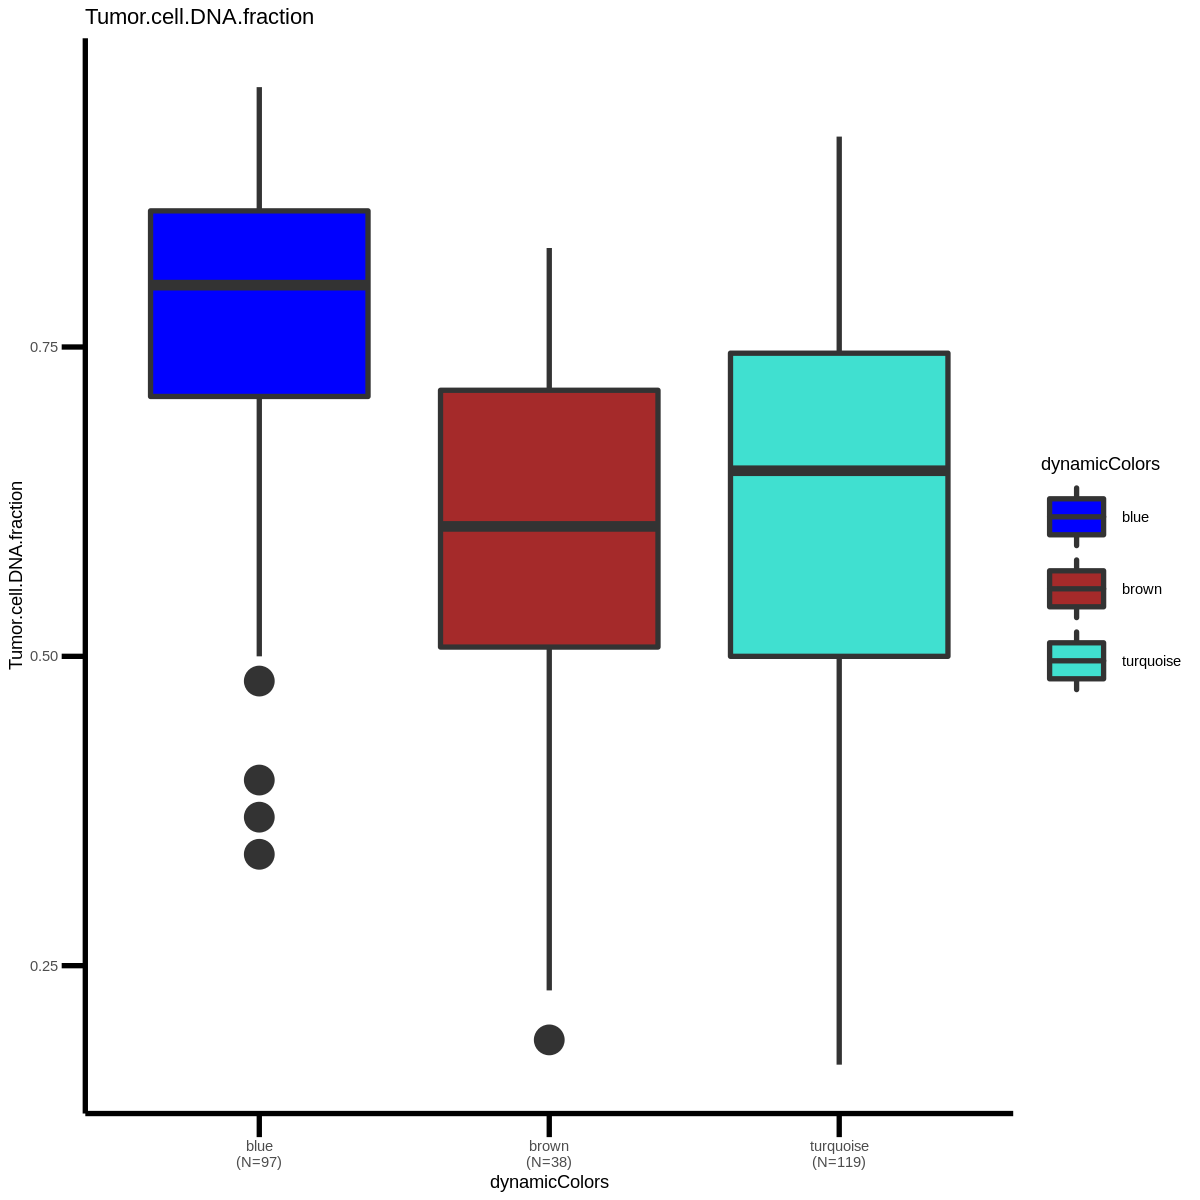

In [26]:
## 3.Overall status
# ABSOLUTE.Ploidy #
library(ggplot2)
character <- "ABSOLUTE.Ploidy"
data=subset(MergeTable.GI.Char, !is.na(MergeTable.GI.Char[,character]))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
options(repr.plot.width=10, repr.plot.height=10)
#options(repr.plot.width=15, repr.plot.height=10)
ggplot(data,aes(x = dynamicColors, y = data[,character],fill=dynamicColors))+
  geom_boxplot(lwd=1.5,outlier.size = 8)+scale_x_discrete(labels=xlabs) + 
  theme_classic()+
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
       axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  scale_fill_manual(values=c("blue","brown","turquoise","yellow")) +
  labs(title =character, y = character)

# ABSOLUTE.Purity #
library(ggplot2)
character <- "ABSOLUTE.Purity"
data=subset(MergeTable.GI.Char, !is.na(MergeTable.GI.Char[,character]))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")

ggplot(data,aes(x = dynamicColors, y = data[,character],fill=dynamicColors))+
  geom_boxplot(lwd=1.5,outlier.size = 8)+scale_x_discrete(labels=xlabs) + 
  theme_classic()+
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
       axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  scale_fill_manual(values=c("blue","brown","turquoise","yellow")) +
  labs(title =character, y = character)
# Tumor.cell.DNA.fraction #
library(ggplot2)
character <- "Tumor.cell.DNA.fraction"
data=subset(MergeTable.GI.Char, !is.na(MergeTable.GI.Char[,character]))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
ggplot(data,aes(x = dynamicColors, y = data[,character],fill=dynamicColors))+
  geom_boxplot(lwd=1.5,outlier.size = 8)+scale_x_discrete(labels=xlabs) + 
  theme_classic()+
  theme(axis.line = element_line(colour = 'black', size = 1.5),axis.ticks = element_line(colour = "black", size = 1.5),
       axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  scale_fill_manual(values=c("blue","brown","turquoise","yellow")) +
  labs(title =character, y = character)


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


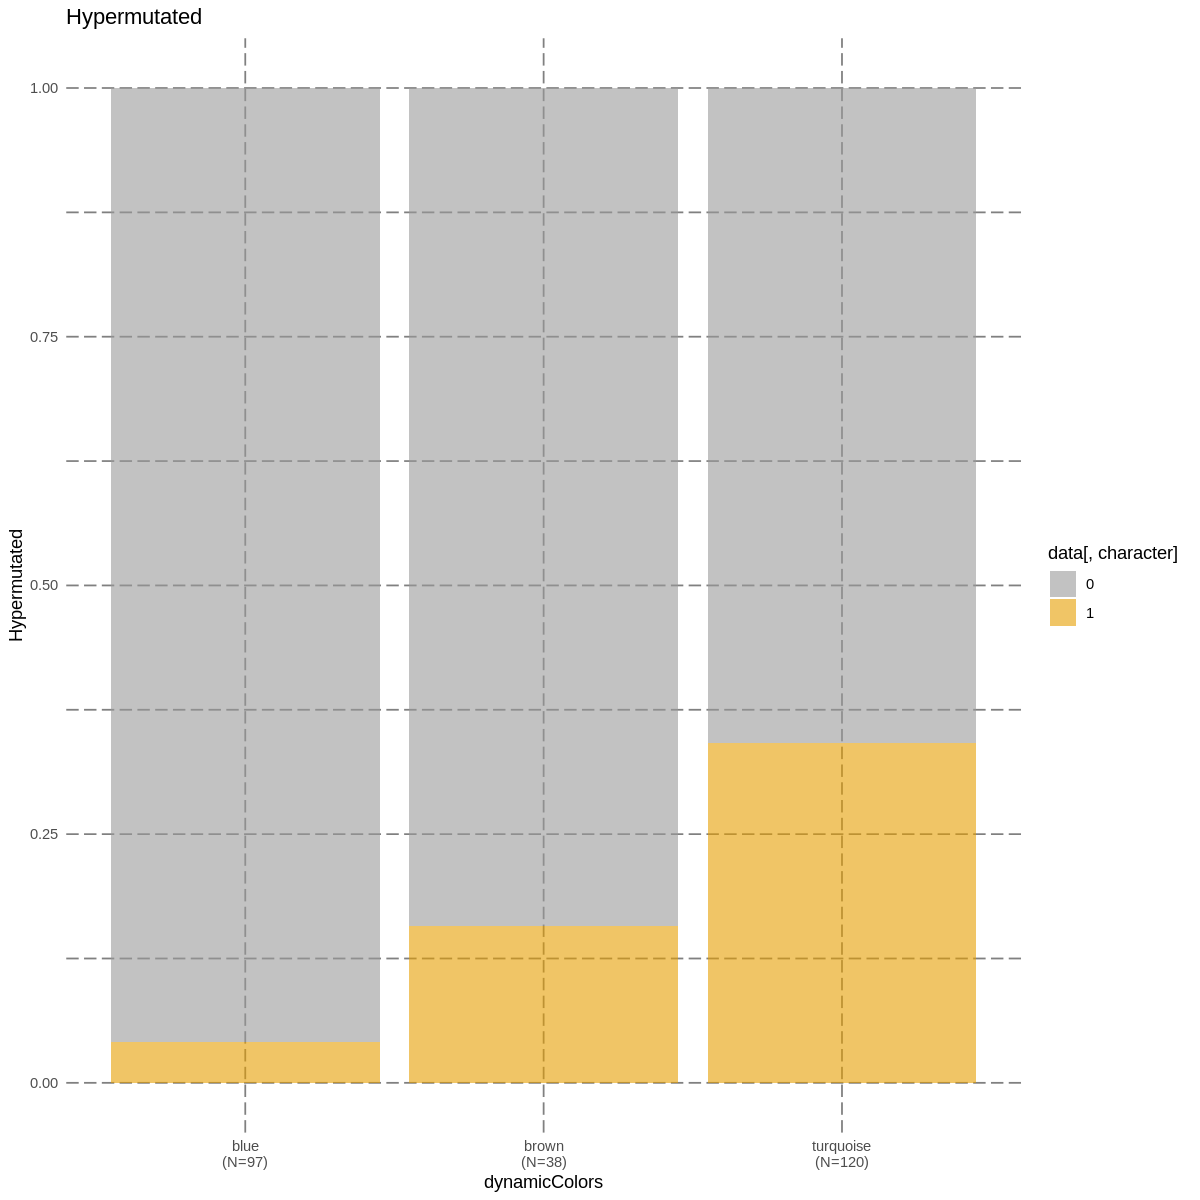

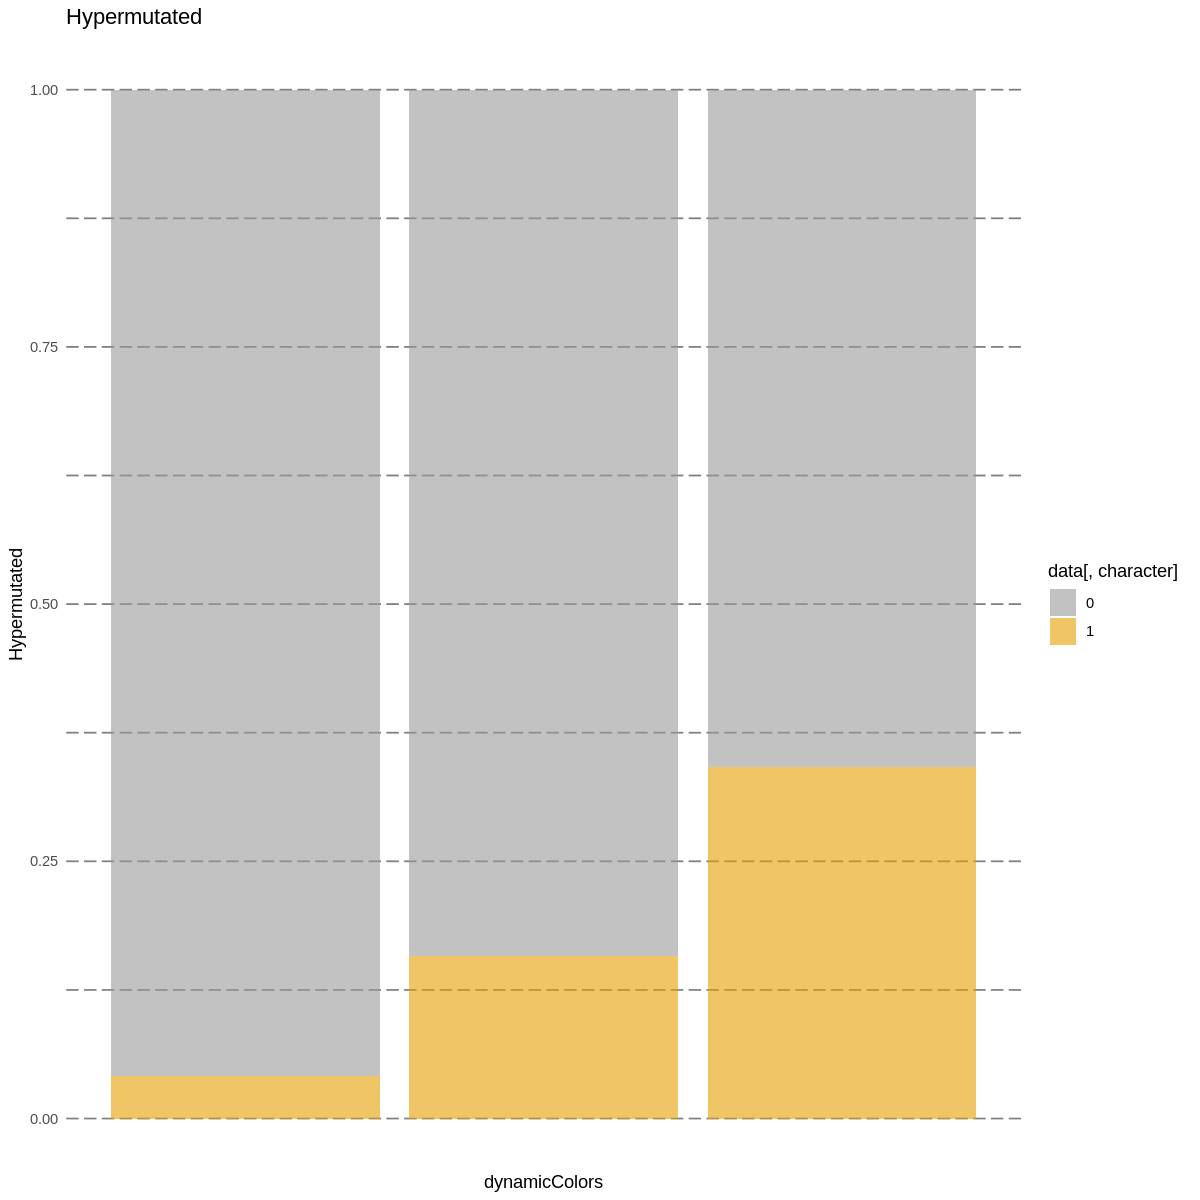

In [15]:
# Hypermutated #
library(ggplot2)
character <- "Hypermutated"
data=subset(MergeTable.GI.Char, !is.na(MergeTable.GI.Char[,character]))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
data[,character] <- as.factor(data[,character])
options(repr.plot.width=10, repr.plot.height=10)
ggplot(data,aes(x = dynamicColors,fill=data[,character]))+
  geom_bar(position = "fill") + scale_x_discrete(labels=xlabs) + theme_minimal() +
  theme(panel.grid.minor = element_line(size = 0.5,colour = "#808080",linetype = "longdash"), 
        panel.grid.major = element_line(size = 0.5,colour = "#808080",linetype = "longdash"))+

  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9"),0.6)) +
  labs(title =character, y = character)
# Hypermutated #
library(ggplot2)
character <- "Hypermutated"
data=subset(MergeTable.GI.Char, !is.na(MergeTable.GI.Char[,character]))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
data[,character] <- as.factor(data[,character])
options(repr.plot.width=10, repr.plot.height=10)
ggplot(data,aes(x = dynamicColors,fill=data[,character]))+
  geom_bar(position = "fill") + scale_x_discrete(labels=xlabs) + theme_minimal() +
  theme(panel.grid.minor = element_line(size = 0.5,colour = "#808080",linetype = "longdash"), 
        panel.grid.major = element_line(size = 0.5,colour = "#808080",linetype = "longdash"))+
  scale_x_discrete(breaks = NULL) + 
  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9"),0.6)) +
  labs(title =character, y = character)

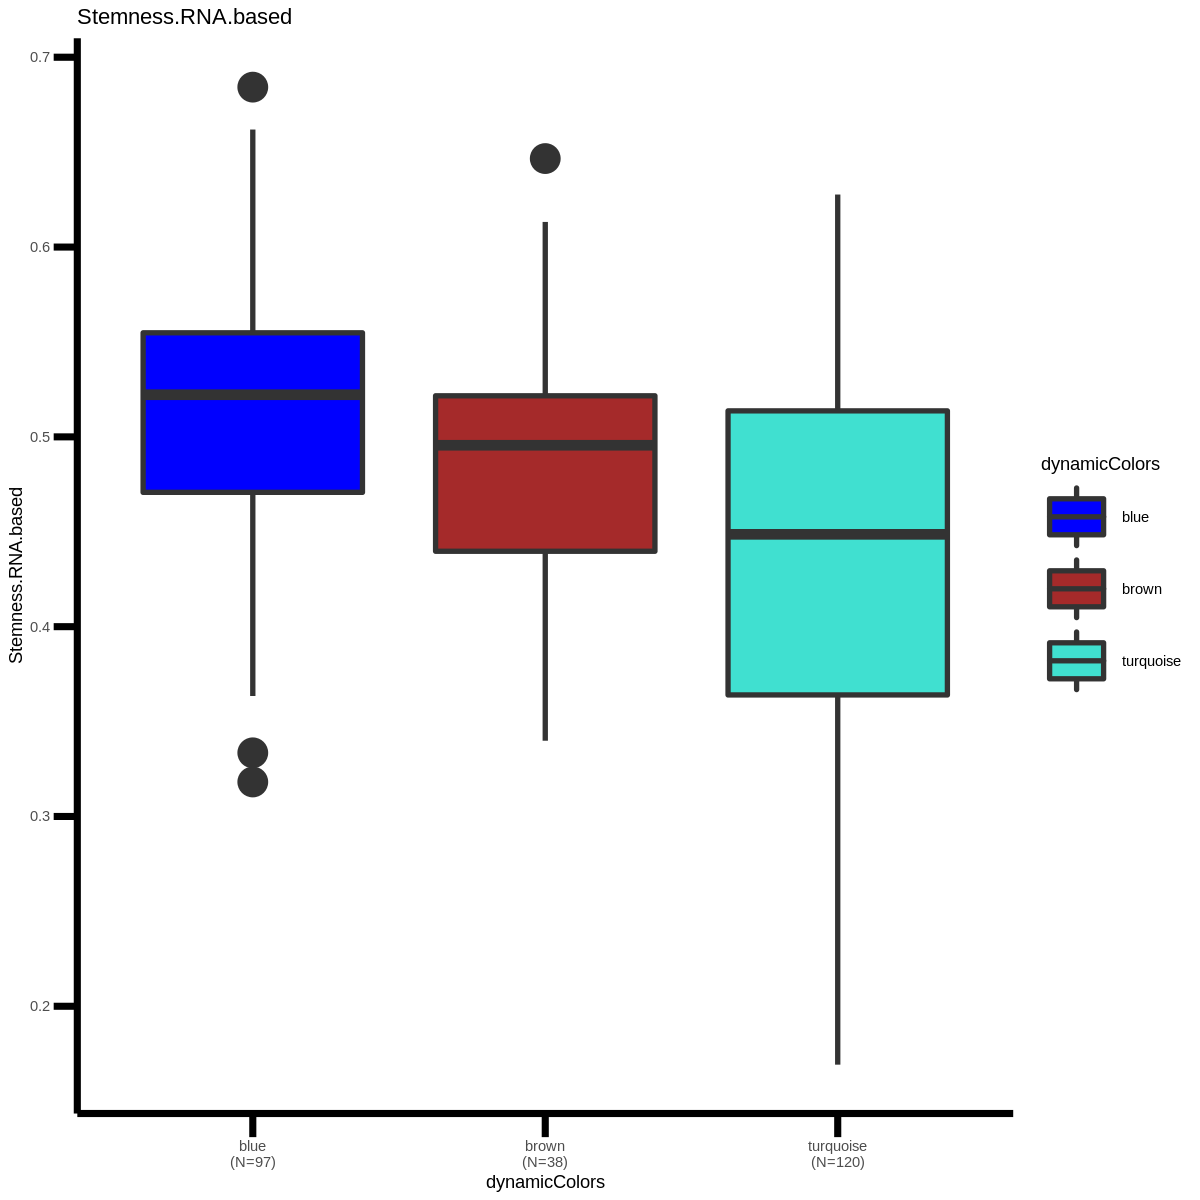

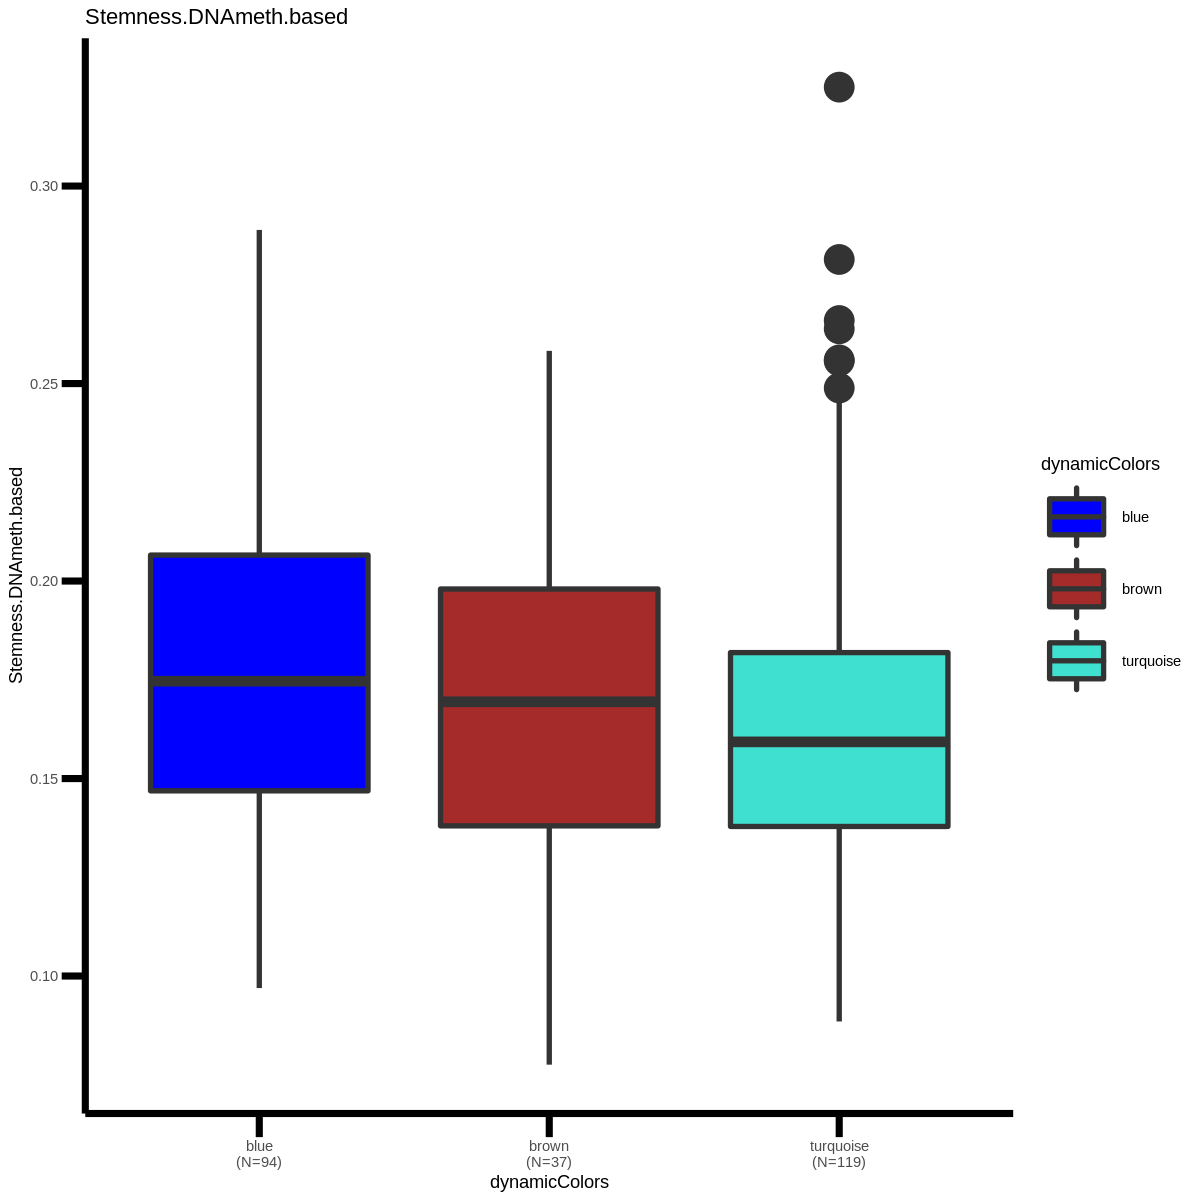

In [25]:
# Stemness.RNA.based #
options(repr.plot.width=10, repr.plot.height=10)
library(ggplot2)
character <- "Stemness.RNA.based"
data=subset(MergeTable.GI.Char, !is.na(MergeTable.GI.Char[,character]))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
options(repr.plot.width=10, repr.plot.height=10)
ggplot(data,aes(x = dynamicColors, y = data[,character],fill=dynamicColors))+
  geom_boxplot(lwd=1.5,outlier.size = 8)+scale_x_discrete(labels=xlabs) + 
  theme_classic()+
  theme(axis.line = element_line(colour = 'black', size = 2),axis.ticks = element_line(colour = "black", size = 2),
       axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  scale_fill_manual(values=c("blue","brown","turquoise","yellow")) +
  labs(title =character, y = character)

# Stemness.DNAmeth.based #
library(ggplot2)
character <- "Stemness.DNAmeth.based"
data=subset(MergeTable.GI.Char, !is.na(MergeTable.GI.Char[,character]))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
ggplot(data,aes(x = dynamicColors, y = data[,character],fill=dynamicColors))+
  geom_boxplot(lwd=1.5,outlier.size = 8)+scale_x_discrete(labels=xlabs) +
  theme_classic()+
  theme(axis.line = element_line(colour = 'black', size = 2),axis.ticks = element_line(colour = "black", size = 2),
       axis.ticks.length=unit(.5, "cm"),legend.key.size =unit(3,"line"))+
  scale_fill_manual(values=c("blue","brown","turquoise","yellow")) +
  labs(title =character, y = character)

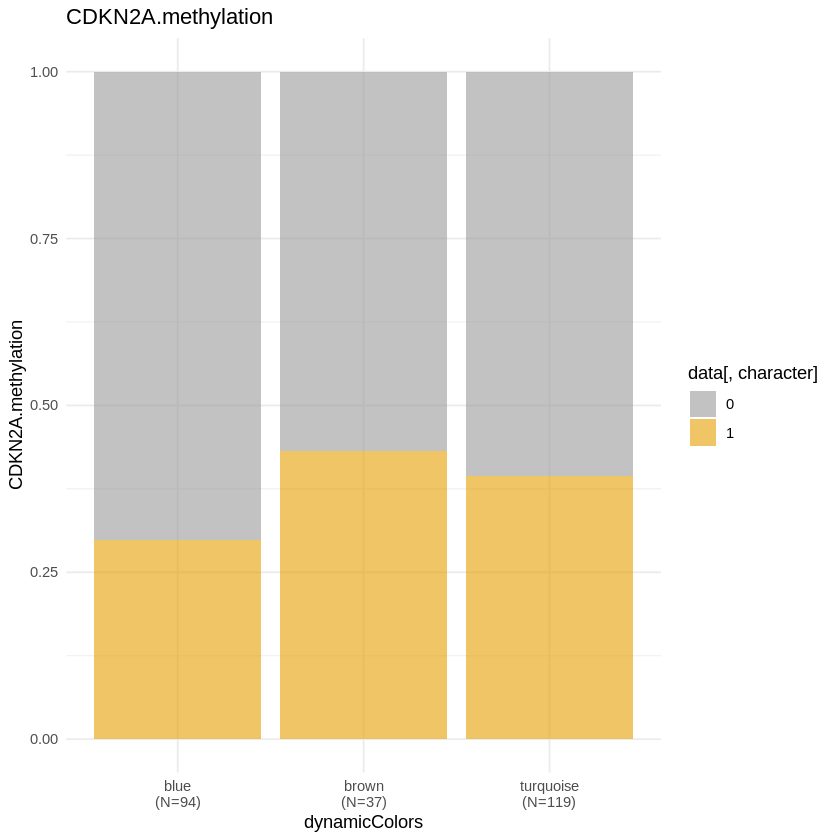

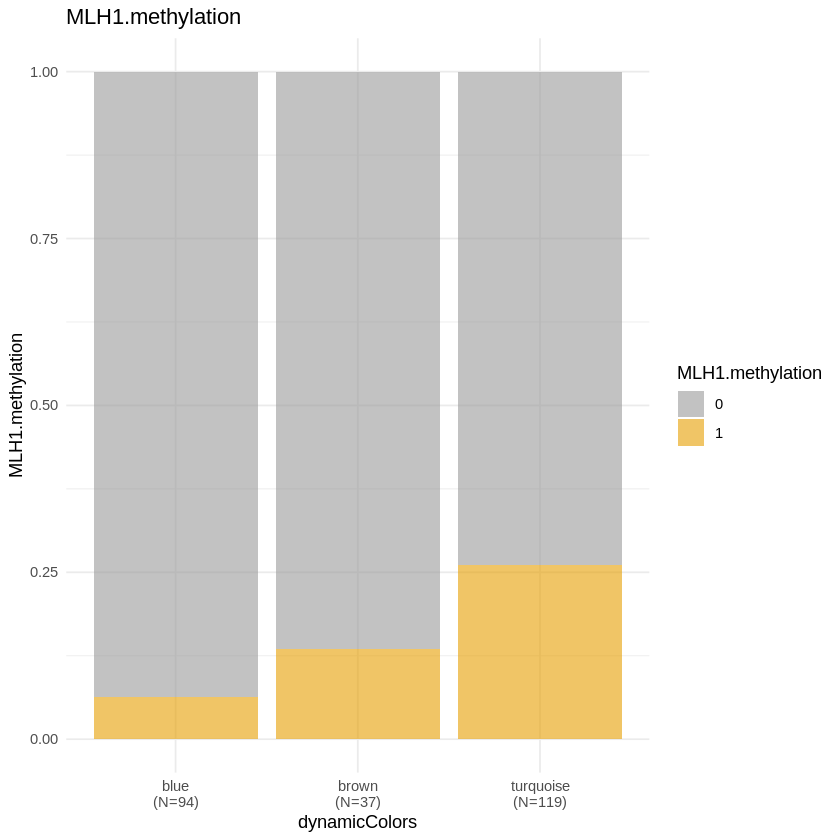

In [5]:
#MergeTable.GI.Char$Tumor.cell.DNA.fraction

# CDKN2A.methylation #
library(ggplot2)
character <- "CDKN2A.methylation"
data=subset(MergeTable.GI.Char, !is.na(MergeTable.GI.Char[,character]))
data[,character] <- as.factor(data[,character])
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
ggplot(data,aes(x = dynamicColors,fill=data[,character]))+
  geom_bar(position = "fill") +scale_x_discrete(labels=xlabs) + theme_minimal() +
  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9"),0.6)) +
  labs(title =character, y = character)

#ggplot2_barPlot_JH(df = MergeTable.GI.Char,groupInfo = "dynamicColors",character = "CDKN2A.methylation",
#                   values= alpha(c("#999999", "#E69F00", "#56B4E9"),0.6))

# MLH1.methylation #
library(ggplot2)
character <- "MLH1.methylation"
data=subset(MergeTable.GI.Char, !is.na(MergeTable.GI.Char[,character]))
data[,character] <- as.factor(data[,character])
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
ggplot(data,aes(x = dynamicColors,fill=MLH1.methylation))+
  geom_bar(position = "fill") +scale_x_discrete(labels=xlabs) + theme_minimal() +
  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9"),0.6)) +
  labs(title =character, y = character)